# Least Squares Simplification

In this notebook, we explore the implications of zero-mean distributions on a least squares fit.

First, let $L$ be a block luma samples and $C$ the correspoding chroma samples

In [1]:
from sympy import diff, Eq, expand, factor, Idx, IndexedBase, symbols, solveset, summation, init_printing   
init_printing()

N = symbols('N', integer='True')
a, b = symbols('alpha, beta', integer='True')
i = symbols('i', cls=Idx)
L = IndexedBase('L', shape=N)
C = IndexedBase('C', shape=N)

Next, we define $e$ as the squarred prediction error from a linear model using zero-mean luma samples to predict chroma samples.

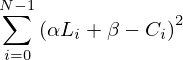

In [2]:
e = summation((a*L[i] + b - C[i])**2, (i,0,N-1))
e

## Equation for $\alpha$
To minimize the error, we compute the derivative with respect to $\alpha$ and expand the result

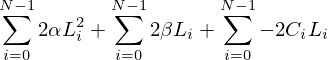

In [3]:
da = diff(e, a).expand()
da

Since $L$ is zero-mean, the sum Àof L is 0. As such, we can remove the middle term

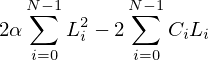

In [4]:
dazm = (factor(da.args[0]) + factor(da.args[1]) + factor(da.args[2])).subs(summation(L[i], (i,0,N-1)),0)
dazm

We solve for $\alpha$ with the derivative equal to 0

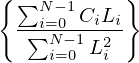

In [5]:
solveset(Eq(dazm,0),a)

From this equation, we see that when $L$ is zero-mean, the equation of $\alpha$ is simplified. 


## Equation for $\beta$
To minimize the error, we compute the derivative with respect to $\beta$ and expand the result

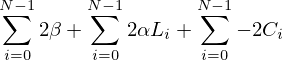

In [6]:
db = diff(e, b).expand()
db

Since $L$ is zero-mean, the sum of L is 0. As such, we can remove the middle term

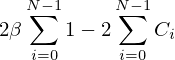

In [7]:
dbzm = (factor(db.args[0]) + factor(db.args[1]) + factor(db.args[2])).subs(summation((L[i]), (i,0,N-1)), 0)
dbzm

We solve for $\beta$ with the derivative equal to 0

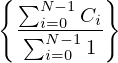

In [8]:
solveset(Eq(dbzm,0),b)

From this equation, we see that when $L$ is zero-mean, the equation of $\beta$ is the average.